# Facebook Prophet Model 

Facebook Prophet Prophet is a procedure for forecasting time series data based on an additive model where 
non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
It works best with time series that have strong seasonal effects and several seasons of historical data. 
Prophet is robust to shifts in the trend, and typically handles outliers well.

## Non-Linear Trends in Time Series Forecasting

A **trend** represents the long-term progression of a time series. While a **linear trend** increases or decreases at a **constant rate**, a **non-linear trend** changes its rate of growth or decay over time.

**ARIMA models treat trend as a problem to remove, not as a component to explain.** <br>
**ARIMA does not model changepoints**

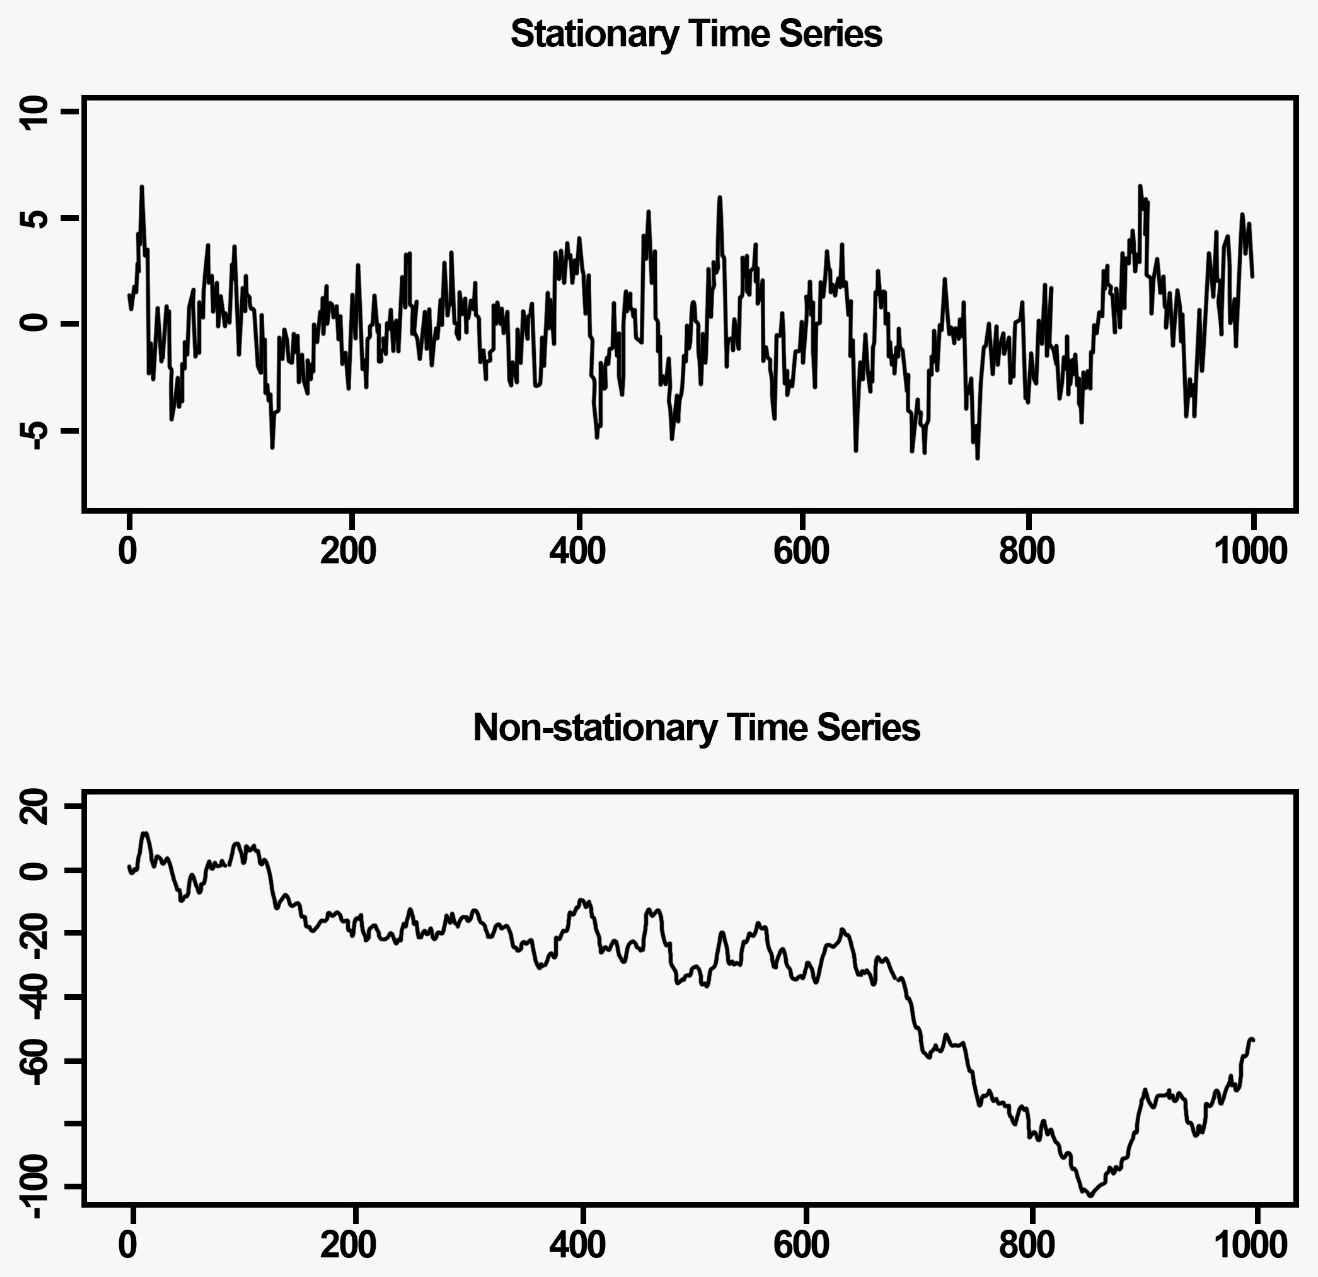

In [38]:
from IPython.display import Image, display
display(Image(r"C:\Users\Brahim\a93ff4ea-587e-4800-89b2-49467972ac25.jpeg"))

# 📈 Non-Linear Trends in Time Series Forecasting

A **trend** represents the long-term progression of a time series. While a **linear trend** increases or decreases at a **constant rate**, 
a **non-linear trend** changes its rate of growth or decay over time.

## Examples of Non-Linear Trend Models

### 1. Quadratic / Polynomial Trend

Captures acceleration or deceleration in the trend.

$$
y_t = \alpha + \beta_1 t + \beta_2 t^2
$$

- If \( \beta_2 > 0 \): upward curve  
- If \( \beta_2 < 0 \): downward curve  
- Used in macroeconomic growth, learning curves

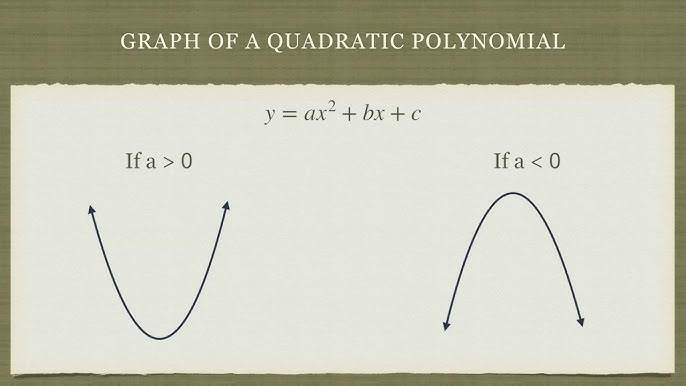

In [4]:
from IPython.display import Image, display
display(Image(r"C:\Users\Brahim\hq720.jpg"))

### 2. Exponential Growth

$$
y_t = ae^{bt}
$$

- \( b > 0 \): exponential growth  
- \( b < 0 \): exponential decay  
- Used for modeling populations, pandemics, viral content

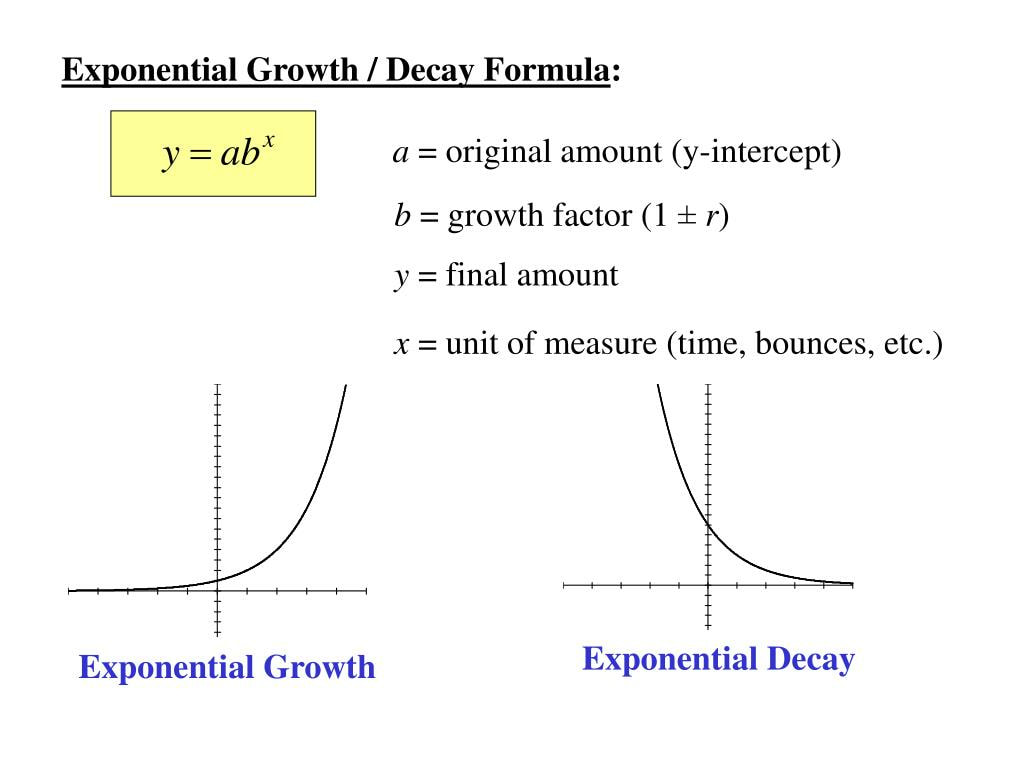

In [6]:
from IPython.display import Image, display
display(Image(r"C:\Users\Brahim\slide1-l_1_orig.jpg"))

### 3. Logistic Growth (S-shaped) #Rapid rise then plateau 

$$
y_t = \frac{C}{1 + e^{-k(t - m)}}
$$

- Starts slowly, grows rapidly, and then **flattens**  
- \( C \): carrying capacity (maximum value)  
- Used in technology adoption, diffusion of innovations, and saturation modeling

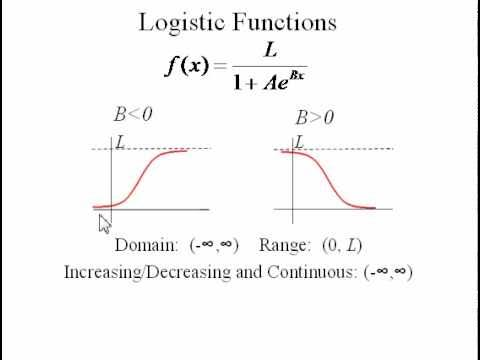

In [7]:
from IPython.display import Image, display
display(Image(r"C:\Users\Brahim\hqdefault.jpg"))

### 4. Piecewise Linear Trend (Used in Facebook Prophet) #This allows Prophet to detect structural breaks

Breaks the trend into segments, each with a different slope:

$$
g(t) = \left(k + \mathbf{a}(t)^\top \delta \right) t + \left(m + \mathbf{a}(t)^\top \gamma \right)
$$

- Prophet uses this to detect **changepoints** automatically  
- Allows for **non-linear global behavior**, even though each segment is linear

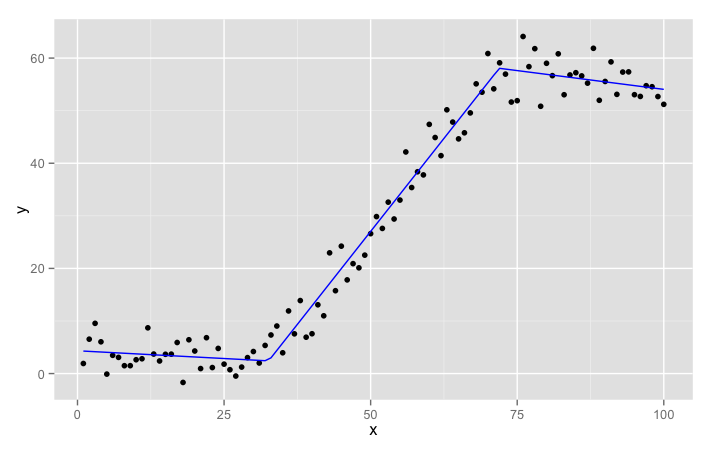

In [8]:
from IPython.display import Image, display
display(Image(r"C:\Users\Brahim\0AZL7.png"))




## Model Decomposition

Prophet models a univariate time series \( y(t) \) using an **additive model**:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

Where:
- \( g(t) \): **Trend function** (Piecewise Linear Trend  & Logistic Growth Trend)
- \( s(t) \): **Seasonality** component (e.g., weekly, yearly)
- \( h(t) \): **Holiday effects**, capturing irregular events
- \( \varepsilon_t \): **Error term**, assumed to be normally distributed

## 📦 Features of Prophet

- **Automatic changepoint detection** for structural breaks
- Handles **outliers** robustly
- Accepts **external regressors**
- Provides **forecast uncertainty intervals**
- Designed for **daily or higher-frequency data**

---

#### Forecasting Using FbProphet

In [2]:
#python -m pip install prophet

In [54]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
url = "https://raw.githubusercontent.com/brahzr/Time-series-Analysis/refs/heads/main/airline_passengers.csv"
df=pd.read_csv(url)

In [106]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [107]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<Axes: >

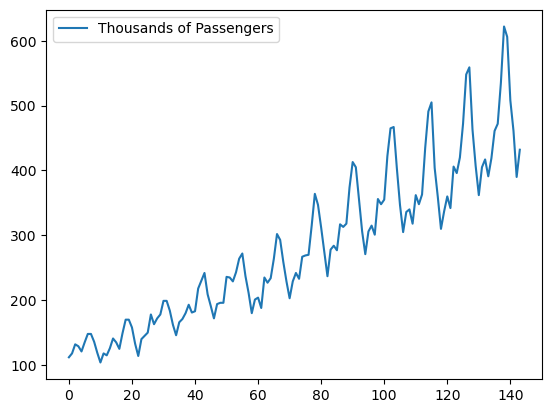

In [108]:
df.plot()

In [112]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
#df.dropna(df[""]) axis = 0 rows, axis = 1 columns

In [113]:
df.drop(144,axis=0,inplace=True)

In [114]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      145 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [115]:
df['ds'] = pd.to_datetime(df['ds'])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [117]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [118]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [52]:
dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonalit

In [ ]:
model.

In [145]:
# Initialize the Model
model = Prophet()  #interval_width=0.95

In [146]:
model.fit(df)

20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing


---

In [56]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [122]:
### Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [123]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [124]:
prediction = model.predict(future_dates)

In [127]:
prediction.head()
#Estimated trend component (e.g., from piecewise linear or logistic growth)
#additive_terms: Sum of all additive components (seasonality + holidays + others)
#yhat = trend + additive_terms
#yearly: Estimated yearly seasonality
#multiplicative_terms: Combined effect of seasonal and holiday terms when used multiplicatively

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662351,57.062353,114.275145,106.662351,106.662351,-21.848235,-21.848235,-21.848235,-21.848235,-21.848235,-21.848235,0.0,0.0,0.0,84.814116
1,1949-02-01,108.835378,48.418234,106.254524,108.835378,108.835378,-30.607610,-30.607610,-30.607610,-30.607610,-30.607610,-30.607610,0.0,0.0,0.0,78.227768
2,1949-03-01,110.798112,80.169467,141.524593,110.798112,110.798112,-0.455867,-0.455867,-0.455867,-0.455867,-0.455867,-0.455867,0.0,0.0,0.0,110.342245
3,1949-04-01,112.971139,77.663753,137.033849,112.971139,112.971139,-5.160420,-5.160420,-5.160420,-5.160420,-5.160420,-5.160420,0.0,0.0,0.0,107.810719
4,1949-05-01,115.074068,81.807987,140.429977,115.074068,115.074068,-3.807959,-3.807959,-3.807959,-3.807959,-3.807959,-3.807959,0.0,0.0,0.0,111.266109


In [132]:
prediction[['ds','yhat','yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814116,57.062353,114.275145
1,1949-02-01,78.227768,48.418234,106.254524
2,1949-03-01,110.342245,80.169467,141.524593
3,1949-04-01,107.810719,77.663753,137.033849
4,1949-05-01,111.266109,81.807987,140.429977


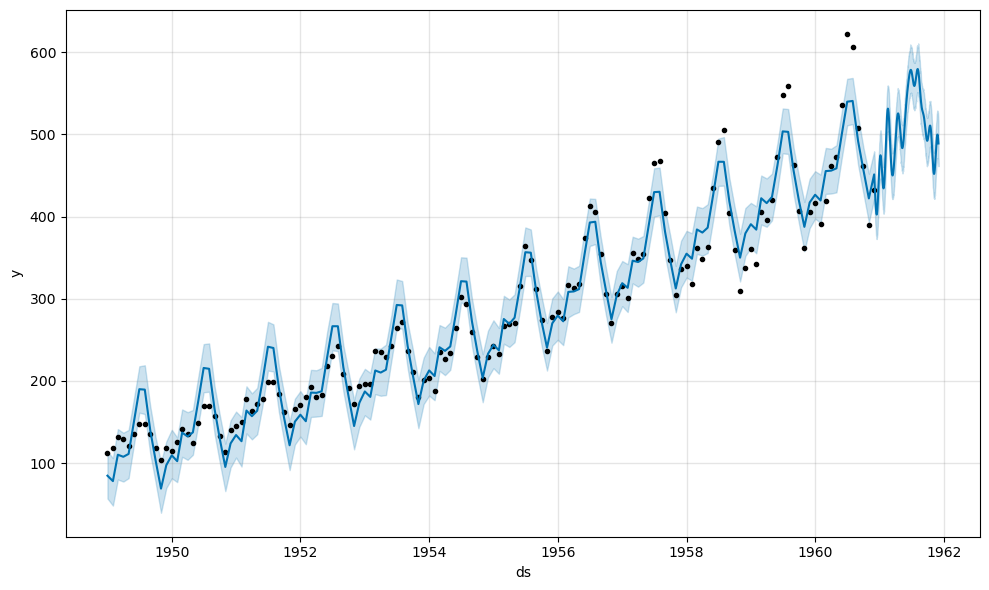

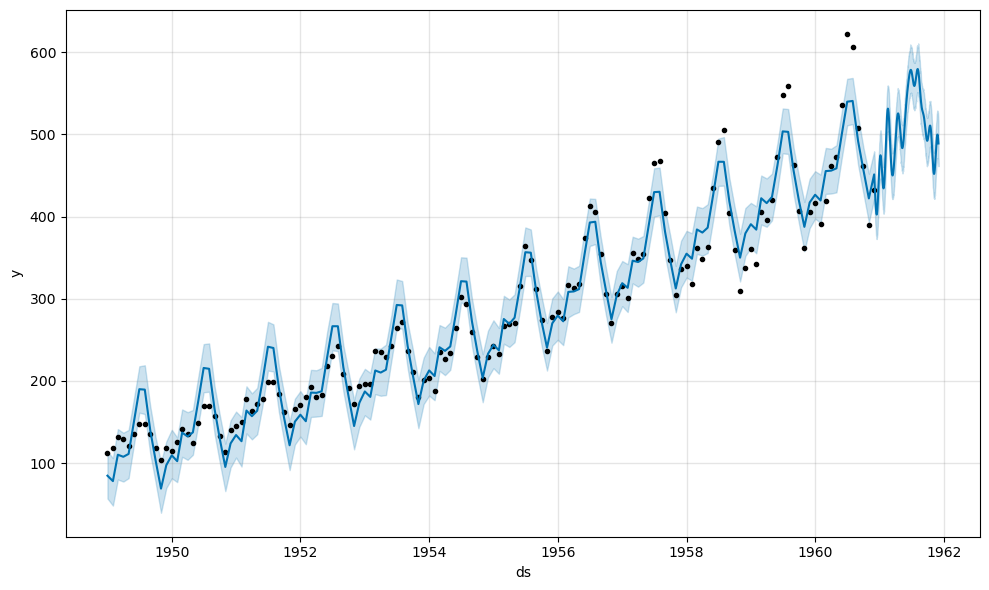

In [133]:
### plot the predicted projection
model.plot(prediction)
#Black points: observed values from your original data
#Blue Line: the forecast (yhat) from the model.
#Shaded Area: the uncertainty interval, defined by: yhat_lower & yhat_upper

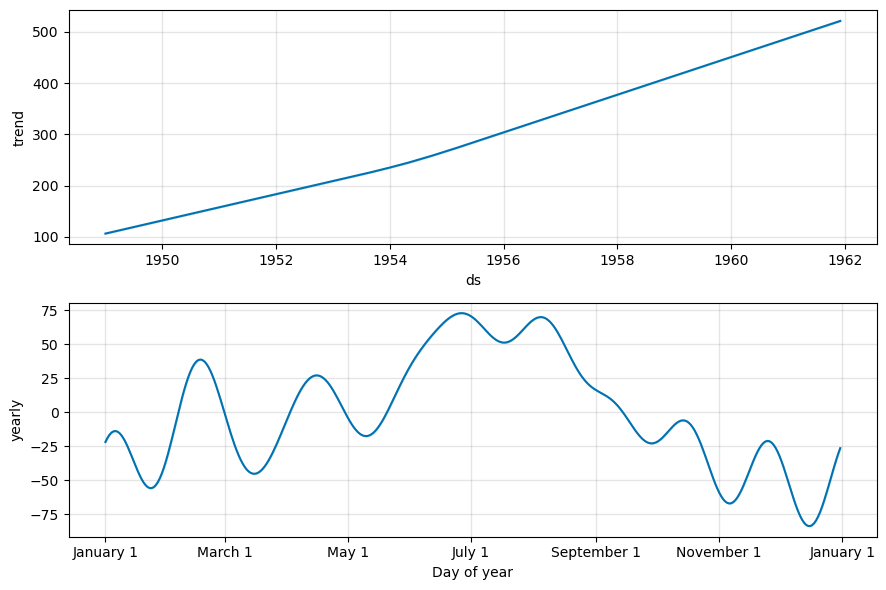

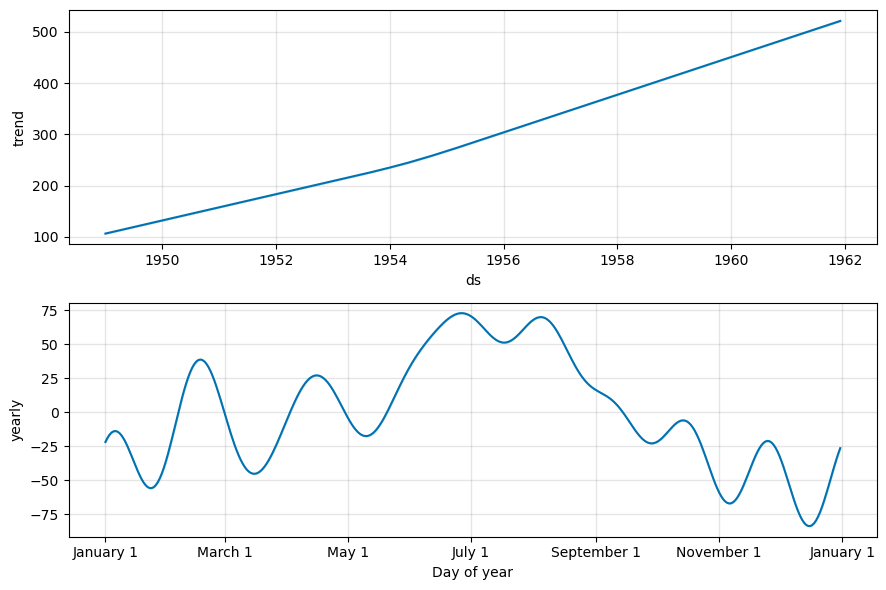

In [32]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

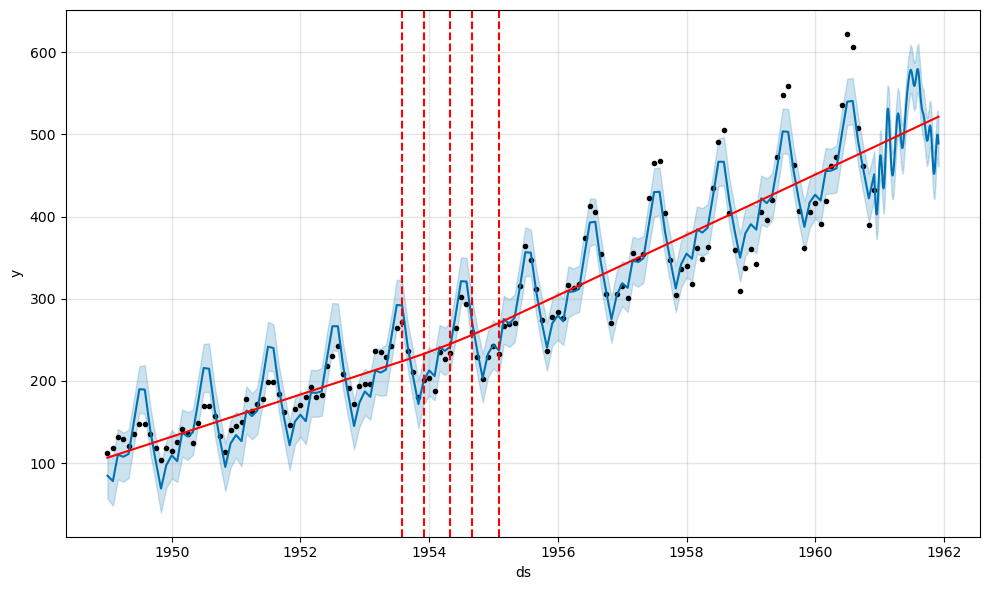

In [134]:
#Detect changepoints
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

**Acuracy and Performance**

Train on 2 years → predict 1 year → check accuracy  
Shift 6 months → train again → predict next year → check again  
... repeat

In [143]:
from prophet.diagnostics import cross_validation

In [147]:
df_cv = cross_validation(model,
    initial='730 days',   #2 years for training  
    period='180 days',    #6 months for training each time
    horizon='365 days')   #predict 1 year
df_cv(15)

  0%|          | 0/19 [00:00<?, ?it/s]

20:18:40 - cmdstanpy - INFO - Chain [1] start processing
20:19:33 - cmdstanpy - INFO - Chain [1] done processing
20:19:33 - cmdstanpy - INFO - Chain [1] start processing
20:19:34 - cmdstanpy - INFO - Chain [1] done processing
20:19:35 - cmdstanpy - INFO - Chain [1] start processing
20:19:36 - cmdstanpy - INFO - Chain [1] done processing
20:19:37 - cmdstanpy - INFO - Chain [1] start processing
20:19:38 - cmdstanpy - INFO - Chain [1] done processing
20:19:39 - cmdstanpy - INFO - Chain [1] start processing
20:19:40 - cmdstanpy - INFO - Chain [1] done processing
20:19:40 - cmdstanpy - INFO - Chain [1] start processing
20:19:41 - cmdstanpy - INFO - Chain [1] done processing
20:19:42 - cmdstanpy - INFO - Chain [1] start processing
20:19:43 - cmdstanpy - INFO - Chain [1] done processing
20:19:44 - cmdstanpy - INFO - Chain [1] start processing
20:19:44 - cmdstanpy - INFO - Chain [1] done processing
20:19:45 - cmdstanpy - INFO - Chain [1] start processing
20:19:46 - cmdstanpy - INFO - Chain [1]

TypeError: 'DataFrame' object is not callable

In [149]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [150]:
df_cv.head(50)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.204923,157.006958,157.459611,150.0,1951-01-18
1,1951-03-01,169.726451,169.101650,170.508744,178.0,1951-01-18
2,1951-04-01,157.272723,156.068245,158.661803,163.0,1951-01-18
3,1951-05-01,143.304541,141.430048,145.502668,172.0,1951-01-18
4,1951-06-01,178.017915,175.296556,181.091239,178.0,1951-01-18
5,1951-07-01,207.406452,203.600734,211.404706,199.0,1951-01-18
6,1951-08-01,207.625821,202.825505,212.703048,199.0,1951-01-18
7,1951-09-01,193.803347,187.702445,200.165714,184.0,1951-01-18
8,1951-10-01,159.159701,151.666263,166.832448,162.0,1951-01-18
9,1951-11-01,134.732309,125.892971,143.821178,146.0,1951-01-18


In [151]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p
# coverage : % of actual values that fell inside the prediction interval (95% interval by default)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585383,32.978559,25.828263,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.335537,31.848635,25.247414,0.076910,0.073741,0.077630,0.181818
2,46 days,909.314434,30.154841,24.670964,0.078810,0.079314,0.078584,0.136364
3,47 days,1044.684948,32.321586,26.845558,0.081985,0.085520,0.082145,0.136364
4,48 days,1034.254324,32.159825,26.300179,0.080102,0.085520,0.080328,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,761.528447,27.595805,21.436164,0.067738,0.061561,0.067426,0.295455
166,360 days,765.071983,27.659935,21.721641,0.068615,0.061561,0.068321,0.272727
167,362 days,857.830053,29.288736,22.974144,0.067674,0.061561,0.067882,0.272727
168,364 days,831.540579,28.836445,21.907661,0.064765,0.049890,0.065070,0.318182


In [72]:
df_p = performance_metrics(df_cv)
print(df_p['coverage'].mean())  # Output: 0.37

0.37406417112299456


---

## 📈 ARDL Model — Autoregressive Distributed Lag

### 🔍 Objective

The ARDL model is used to analyze the relationship between a dependent variable and its own lags as well as **lags of explanatory variables**. It is especially useful when:

- Variables are **I(0)** or **I(1)** (but **not I(2)**)
- You suspect a **long-run relationship** (cointegration) exists
- You want to model both **short-run dynamics** and **long-run equilibrium**

---

### 📐 ARDL(p, q) Model Form (Single Regressor)

$$
y_t = \alpha + \sum_{i=1}^{p} \beta_i y_{t-i} + \sum_{j=0}^{q} \delta_j x_{t-j} + \varepsilon_t
$$

Where:

- \( y_t \): dependent variable
- \( x_t \): explanatory variable
- \( p, q \): lag orders for \( y \) and \( x \)
- \( \varepsilon_t \): error term

---
### 🔁 Error Correction Representation (if cointegration exists)

$$
\Delta y_t = \phi (y_{t-1} - \theta x_{t-1}) + \sum_{i=1}^{p-1} \gamma_i \Delta y_{t-i} + \sum_{j=0}^{q-1} \lambda_j \Delta x_{t-j} + u_t
$$

- \( \phi \): speed of adjustment parameter (should be negative and significant)
- \( \theta \): long-run coefficient
- \( \Delta \): first difference operator

This form separates:

- **Short-run effects** via differences \( \Delta y, \Delta x \)
- **Long-run equilibrium** via the term \( y_{t-1} - \theta x_{t-1} \)

---

### ⚠️ Assumptions

- \( y_t \) and \( x_t \) are I(0) or I(1), not I(2)
- Residuals are not serially correlated
- No multicollinearity in regressors
- Sufficient sample size for lag structure

---

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
#import data
url = "https://raw.githubusercontent.com/brahzr/Time-series-Analysis/refs/heads/main/panel_example"
data = pd.read_csv(url)
data.head()

,Year,CO2 emissions,Population density,Population total,GDP,Energy use
0,1974,9614.874,6.362408,15153602,1.320987e+10,342.258098
1,1975,11301.694,6.602187,15724692,1.555790e+10,351.080772
2,1976,11045.004,6.927925,16500516,1.772824e+10,381.842544
3,1977,13879.595,7.193981,17134192,2.097211e+10,411.592213
4,1978,13175.531,7.403262,17632645,2.636449e+10,492.452664


In [154]:
# Inspect
print(repr(list(data.columns)))

['Year', 'CO2 emissions ', 'Population density ', 'Population total', 'GDP', 'Energy use']


In [155]:
#rename columns
data.rename(columns={
    "CO2 emissions ": "CO2",
    "Population density ": "POPD",
    "Population total": "POP",
    "Energy use": "ENR"
}, inplace=True)

In [156]:
data.head()

,Year,CO2,POPD,POP,GDP,ENR
0,1974,9614.874,6.362408,15153602,1.320987e+10,342.258098
1,1975,11301.694,6.602187,15724692,1.555790e+10,351.080772
2,1976,11045.004,6.927925,16500516,1.772824e+10,381.842544
3,1977,13879.595,7.193981,17134192,2.097211e+10,411.592213
4,1978,13175.531,7.403262,17632645,2.636449e+10,492.452664


In [157]:
data.tail()

,Year,CO2,POPD,POP,GDP,ENR
36,2010,45401.127,15.054684,35856344,1.780000e+11,1117.980489
37,2011,46959.602,15.343212,36543541,2.180000e+11,1144.322850
38,2012,48580.416,15.644261,37260563,2.270000e+11,1233.616948
39,2013,51961.390,15.954985,38000626,2.300000e+11,1252.074795
40,2014,52900.142,16.273887,38760168,2.390000e+11,1333.136069


**Simple EDA**

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    41 non-null     int64  
 1   CO2     41 non-null     float64
 2   POPD    41 non-null     float64
 3   POP     41 non-null     int64  
 4   GDP     41 non-null     float64
 5   ENR     41 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.1 KB


In [159]:
#change datatypes
#data["CO2"] = pd.to_numeric(data["CO2"])
#data["POPD"] = pd.to_numeric(data["POPD"])
#data["ENR"] = pd.to_numeric(data["ENR"])
data["Year"] = pd.to_datetime(data["Year"])

In [40]:
#data.set_index(data["Year"], inplace = True)

In [160]:
#check datatypes
data.dtypes

Year    datetime64[ns]
CO2            float64
POPD           float64
POP              int64
GDP            float64
ENR            float64
dtype: object

<Axes: >

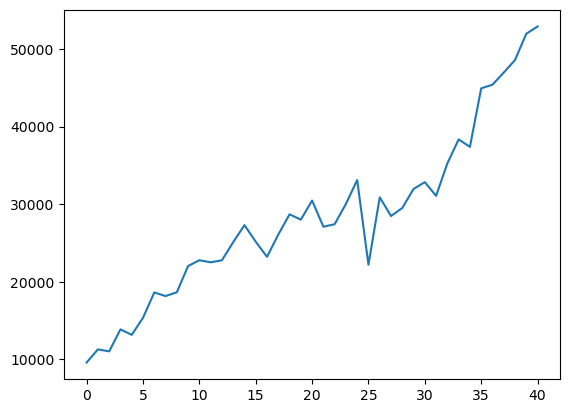

In [12]:
#plot of CO2
data["CO2"].plot()

Checling the Dependent Variable

<Axes: ylabel='Density'>

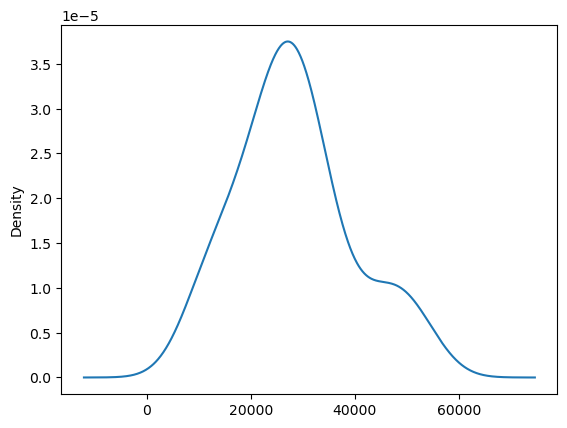

In [161]:
data["CO2"].plot(kind = "kde")

In [162]:
#Jarque Bera
from statsmodels.stats.stattools import jarque_bera
jarque_bera(data["CO2"])

(np.float64(1.6882645198446282),
 np.float64(0.4299302641154239),
 np.float64(0.48530302941473397),
 np.float64(2.785113331209687))

CO2 = f(POPD, ENE)

Correlation Matrix

In [163]:
df = data.drop(columns=["Year", "CO2", "POP"])
df

,POPD,GDP,ENR
0,6.362408,1.320987e+10,342.258098
1,6.602187,1.555790e+10,351.080772
2,6.927925,1.772824e+10,381.842544
3,7.193981,2.097211e+10,411.592213
4,7.403262,2.636449e+10,492.452664
5,7.627609,3.324371e+10,605.505615
6,7.867936,4.234583e+10,597.953091
7,8.124882,4.434859e+10,629.531045
8,8.397263,4.520717e+10,793.431742
9,8.683614,4.880137e+10,829.176770


In [164]:
print(df.corr())

          POPD       GDP       ENR
POPD  1.000000  0.805590  0.922914
GDP   0.805590  1.000000  0.841772
ENR   0.922914  0.841772  1.000000


In [172]:
#log 
LCO2 = np.log(data["CO2"])
LPOP = np.log(data["POP"])
LENR = np.log(data["ENR"])
LGDP = np.log(data["GDP"])

Stationary Check

In [166]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print("ADF Statistics: {}".format(result[0]))
    print("p- value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [167]:
#Y: CO2
adf_test(LCO2)

(np.float64(-2.029416994141223), np.float64(0.273825548869017), 2, 38, {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}, np.float64(-48.90896105579762))
ADF Statistics: -2.029416994141223
p- value: 0.273825548869017
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [168]:
#Yt-1
DLCO2 = LCO2.diff().dropna()
adf_test(DLCO2)

(np.float64(-6.536746457459594), np.float64(9.566635514788489e-09), 1, 38, {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}, np.float64(-47.41127149584702))
ADF Statistics: -6.536746457459594
p- value: 9.566635514788489e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**LCO2 : I1**

In [169]:
#LPOP
adf_test(LPOP)

(np.float64(-1.3498925724007955), np.float64(0.6060488348825743), 10, 30, {'1%': np.float64(-3.6699197407407405), '5%': np.float64(-2.9640707407407407), '10%': np.float64(-2.621171111111111)}, np.float64(-365.86707347344515))
ADF Statistics: -1.3498925724007955
p- value: 0.6060488348825743
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [170]:
DLPOP = LPOP.diff().dropna()
adf_test(DLPOP)

(np.float64(-4.245980147036228), np.float64(0.0005502652221410156), 10, 29, {'1%': np.float64(-3.6790595944893187), '5%': np.float64(-2.9678817237279103), '10%': np.float64(-2.6231583472057074)}, np.float64(-354.53177818062693))
ADF Statistics: -4.245980147036228
p- value: 0.0005502652221410156
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**LPOP: I1**

In [171]:
#LPOP
adf_test(LENR)

(np.float64(-3.0689116532515515), np.float64(0.028941058044673233), 1, 39, {'1%': np.float64(-3.610399601308181), '5%': np.float64(-2.939108945868946), '10%': np.float64(-2.6080629651545038)}, np.float64(-108.48618064140868))
ADF Statistics: -3.0689116532515515
p- value: 0.028941058044673233
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**LENR : I0**

In [173]:
#LGDP
adf_test(LGDP)

(np.float64(-0.9813270098201039), np.float64(0.7600137765947432), 3, 37, {'1%': np.float64(-3.6209175221605827), '5%': np.float64(-2.9435394610388332), '10%': np.float64(-2.6104002410518627)}, np.float64(-38.95699703720766))
ADF Statistics: -0.9813270098201039
p- value: 0.7600137765947432
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [179]:
DLGDP = LGDP.diff().dropna()

In [180]:
adf_test(DLGDP)

(np.float64(-1.9243062917608014), np.float64(0.320714462519484), 2, 37, {'1%': np.float64(-3.6209175221605827), '5%': np.float64(-2.9435394610388332), '10%': np.float64(-2.6104002410518627)}, np.float64(-38.22492990537748))
ADF Statistics: -1.9243062917608014
p- value: 0.320714462519484
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [186]:
data["DLCO2"] = DLCO2
data["LENR"] = LENR
data["DLPOP"] = DLPOP

**ARDL model (2,2)**

In [187]:
from statsmodels.tsa.api import ARDL

In [188]:
exog = data[["DLPOP", "LENR"]].dropna()
y = data.loc[exog.index, "DLCO2"]

model = ARDL(y, 2, exog, 2)
res = model.fit()
print(res.summary())

                              ARDL Model Results                              
Dep. Variable:                  DLCO2   No. Observations:                   40
Model:                  ARDL(2, 2, 2)   Log Likelihood                  40.072
Method:               Conditional MLE   S.D. of innovations              0.084
Date:                Mon, 27 Oct 2025   AIC                            -60.144
Time:                        21:20:57   BIC                            -43.769
Sample:                             2   HQIC                           -54.318
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.781      0.362      0.720      -1.314       1.879
DLCO2.L1      -0.6136      0.156     -3.924      0.000      -0.933      -0.294
DLCO2.L2      -0.2909      0.165     -1.760      0.0

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


**Bound Test**

In [39]:
from statsmodels.tsa.ardl import UECM

In [190]:
ecm = UECM(y, 2, exog, 2)
ecm_fit = ecm.fit()
bounds_test = ecm_fit.bounds_test(case = 3)
bounds_test

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


BoundsTestResult
Stat: 16.07125
Upper P-value: 1.46e-09
Lower P-value: 1.33e-10
Null: No Cointegration
Alternative: Possible Cointegration

In [42]:
bounds_test.crit_vals

,lower,upper
percentile,,
90.0,2.729522,3.747156
95.0,3.229022,4.322282
99.0,4.311041,5.542552
99.9,5.759921,7.143546


**ECM coef**

In [50]:
#short and Long run coeff
print(ecm_fit.summary())

                              UECM Model Results                              
Dep. Variable:                D.DLCO2   No. Observations:                   40
Model:                  UECM(2, 2, 2)   Log Likelihood                  40.072
Method:               Conditional MLE   S.D. of innovations              0.150
Date:                Mon, 27 Oct 2025   AIC                            -60.144
Time:                        14:35:01   BIC                            -43.769
Sample:                             2   HQIC                           -54.318
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2826      0.781      0.362      0.720      -1.314       1.879
DLCO2.L1      -1.9045      0.279     -6.835      0.000      -2.474      -1.335
DLPOP.L1       2.3678      2.920      0.811      0.4

The ECM coefficient is the lagged level term, here labeled DLCO2.L1 with value −1.904455

Use the ECM coefficient (λ) to compute adjustment speed:

In [62]:
#hetero and serial correlation
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan

model = smf.ols("DLCO2~LENR+ DLPOP", data = data)
results = model.fit()

In [192]:
#hetero
from statsmodels.stats.diagnostic import het_white

name = ["White  statistic", "p-value"]
test = het_white(results.resid, results.model.exog)
list(zip(name, test))

[('White  statistic', np.float64(6.238675296585976)),
 ('p-value', np.float64(0.2836826880843767))]

In [193]:
#serial autocorrelation
from statsmodels.stats.diagnostic import acorr_breusch_godfrey 
name = ["breusch_godfrey statistic", "p-value"]

test = acorr_breusch_godfrey(results, nlags=None, store=False)
list(zip(name, test))

[('breusch_godfrey statistic', np.float64(19.481588644503802)),
 ('p-value', np.float64(0.012485808418069125))]


## Panel Data Models — Static and Dynamic

### 🔍 Objective

Panel data models analyze data that vary **across entities (i)** and **over time (t)**.

Let \( y_{it} \) be the dependent variable for unit \(i\) at time \(t\).

---

## 🔹 1. Static Panel Data Model (Fixed Effects)

$$
y_{it} = \alpha_i + \mathbf{x}_{it}'\beta + u_{it}
$$

Where:

- \( \alpha_i \): unobserved individual-specific effect (fixed)
- \( \mathbf{x}_{it} \): vector of covariates
- \( \beta \): parameters to estimate
- \( u_{it} \): idiosyncratic error

The fixed-effects model controls for **time-invariant heterogeneity** across individuals.

---

### 🔹 2. Random Effects Model

$$
y_{it} = \alpha + \mathbf{x}_{it}'\beta + \nu_i + u_{it}
$$

- \( \nu_i \): individual-specific random error
- Assumes \( \nu_i \) is uncorrelated with \( \mathbf{x}_{it} \)

Use the **Hausman test** to choose between Fixed vs Random Effects.

---

In [195]:
#imort dataset
url = "https://raw.githubusercontent.com/brahzr/Time-series-Analysis/refs/heads/main/panel.csv"
pdata = pd.read_csv(url)

In [196]:
print(pdata.head())
print(pdata.info())

  Country Name    Year  GDP growth     Trade   Total natural resources rents  \
0      Algeria  2000.0         3.8  62.858344                      26.686897   
1      Algeria  2001.0         3.0  54.529649                      23.630941   
2      Algeria  2002.0         5.4  56.589605                      23.470939   
3      Algeria  2003.0         6.5  57.769135                      24.452323   
4      Algeria  2004.0         4.5  61.357998                      26.157313   

   Population growth  
0           1.399669  
1           1.373291  
2           1.330395  
3           1.329615  
4           1.396440  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   112 non-null    object 
 1   Year                           110 non-null    float64
 2   GDP growth                     1

In [93]:
#!pip install linearmodels

In [197]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

In [198]:
# Inspect
print(repr(list(pdata.columns)))

['Country Name', 'Year', 'GDP growth', 'Trade ', 'Total natural resources rents', 'Population growth']


In [199]:
#rename columns
pdata.rename(columns={
    "GDP growth": "GDP",
    "Total natural resources rents": "TNR",
    "Population growth": "POP",
}, inplace=True)

In [200]:
pdata.head()

,Country Name,Year,GDP,Trade,TNR,POP
0,Algeria,2000.0,3.8,62.858344,26.686897,1.399669
1,Algeria,2001.0,3.0,54.529649,23.630941,1.373291
2,Algeria,2002.0,5.4,56.589605,23.470939,1.330395
3,Algeria,2003.0,6.5,57.769135,24.452323,1.329615
4,Algeria,2004.0,4.5,61.357998,26.157313,1.396440


In [201]:
#pooled OLS
data = pdata.set_index(["Country Name", "Year"])
exog_vars = ["Trade ", "TNR", "POP"]
exog = sm.add_constant(data[exog_vars])
model = PooledOLS(data["GDP"], exog)
pooled_res = model.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    GDP   R-squared:                        0.0315
Estimator:                  PooledOLS   R-squared (Between):             -2.4645
No. Observations:                 110   R-squared (Within):               0.0459
Date:                Mon, Oct 27 2025   R-squared (Overall):              0.0315
Time:                        21:45:16   Log-likelihood                   -370.37
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.1475
Entities:                           5   P-value                           0.3335
Avg Obs:                       22.000   Distribution:                   F(3,106)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             1.1475
                            

C:\Anaconda\Lib\site-packages\linearmodels\panel\model.py:919: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [202]:
#Fixed effect
#individual effect
from linearmodels.panel import PanelOLS
exog_vars = ["Trade", "TNR", "POP"]
model = PanelOLS(data.GDP, exog, entity_effects=True)
fe_res = model.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    GDP   R-squared:                        0.1385
Estimator:                   PanelOLS   R-squared (Between):             -166.79
No. Observations:                 110   R-squared (Within):               0.1385
Date:                Mon, Oct 27 2025   R-squared (Overall):             -0.8200
Time:                        21:46:48   Log-likelihood                   -363.61
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.4654
Entities:                           5   P-value                           0.0016
Avg Obs:                       22.000   Distribution:                   F(3,102)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             5.4654
                            

C:\Anaconda\Lib\site-packages\linearmodels\panel\model.py:1258: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [203]:
fe = fe_res.estimated_effects.unstack(level=0)
print(fe)

             estimated_effects                                        \
Country Name           Algeria    Bahrain Egypt, Arab Rep.      Iraq   
Year                                                                   
2000.0               -2.207685  11.372784         4.264436 -7.753986   
2001.0               -2.207685  11.372784         4.264436 -7.753986   
2002.0               -2.207685  11.372784         4.264436 -7.753986   
2003.0               -2.207685  11.372784         4.264436 -7.753986   
2004.0               -2.207685  11.372784         4.264436 -7.753986   
2005.0               -2.207685  11.372784         4.264436 -7.753986   
2006.0               -2.207685  11.372784         4.264436 -7.753986   
2007.0               -2.207685  11.372784         4.264436 -7.753986   
2008.0               -2.207685  11.372784         4.264436 -7.753986   
2009.0               -2.207685  11.372784         4.264436 -7.753986   
2010.0               -2.207685  11.372784         4.264436 -7.75

In [204]:
#random effect
from linearmodels.panel import RandomEffects
model = RandomEffects(data.GDP, exog)
re_res = model.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    GDP   R-squared:                        0.0315
Estimator:              RandomEffects   R-squared (Between):             -2.4645
No. Observations:                 110   R-squared (Within):               0.0459
Date:                Mon, Oct 27 2025   R-squared (Overall):              0.0315
Time:                        21:48:52   Log-likelihood                   -370.37
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.1475
Entities:                           5   P-value                           0.3335
Avg Obs:                       22.000   Distribution:                   F(3,106)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             1.1475
                            

C:\Anaconda\Lib\site-packages\linearmodels\panel\model.py:2751: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


---